<h1> Data Wrangling

In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
stats = pd.read_csv('hour.csv')

In [3]:
#Shape of dataset
stats.shape

(17379, 17)

<h2> The dataset contains more than 17K records with 17 features

In [4]:
# top 3 rows from the dataset
stats.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/11,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/11,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/11,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [5]:
#finding if any nulls and data types of the features
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


<h3> Renaming the columns, Type casting the attributes 

In [6]:
stats.rename(columns = {'instant': 'rec_id',
                       'dteday':'datetime',
                       'holiday': 'is_holiday',
                       'workingday': 'is_workingday',
                       'weathersit': 'weather_condition',
                       'hum': 'humidity', 
                       'mnth': 'month',
                       'cnt': 'total_count',
                       'hr': 'hour',
                       'yr': 'year'}, inplace = True)

In [7]:
#type casting the attributes
stats['datetime'] = pd.to_datetime(stats.datetime)#dae time conversion
# categorical variables
stats['season'] = stats.season.astype('category')
stats['is_holiday'] = stats.is_holiday.astype('category')
stats['weekday'] = stats.weekday.astype('category')
stats['weather_condition'] = stats.weather_condition.astype('category')
stats['is_workingday'] = stats.is_workingday.astype('category')
stats['month'] = stats.month.astype('category')
stats['year'] = stats.year.astype('category')
stats['hour'] = stats.hour.astype('category')

<h1> Exploratory Data Analysis / Inferential Statistics

[Text(0.5,1,u'Season Wise Hourly Distribution of Bike Rental Counts')]

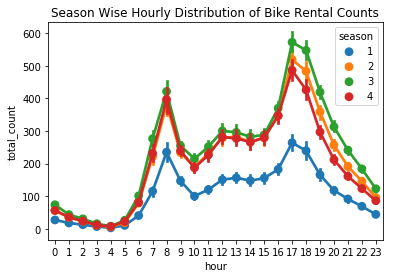

In [8]:
fig, ax = plt.subplots()
sn.pointplot(data = stats[['hour', 'total_count', 'season']], x= 'hour', y = 'total_count', hue = 'season', ax= ax)
ax.set(title = "Season Wise Hourly Distribution of Bike Rental Counts")

<B> Above graph shows similar trends for all seasons with counts peaking in the morning between 
7 -9 AM and in the evening between 4-6 PM for the reason those are business hours. The counts are 
lowest for spring season (Legend 1) while highest for Fall (Legend 3) across 24 hours  </B>

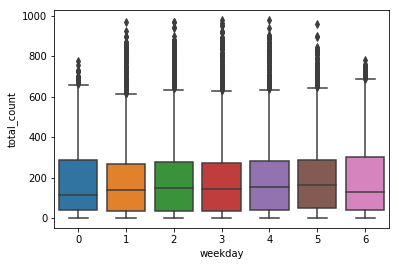

In [9]:
vis2 = sn.boxplot(data=stats, x='weekday', y='total_count')

<B> Rental Duration Variation Across a Quarter

[Text(0.5,1,u'Month Wise Hourly Distribution of Bike Rental Counts')]

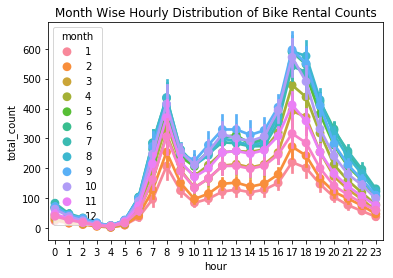

In [10]:
fig, ax = plt.subplots()
sn.pointplot(data = stats[['hour', 'total_count', 'month']], x= 'hour', y = 'total_count', hue = 'month', ax= ax)
ax.set(title = "Month Wise Hourly Distribution of Bike Rental Counts")

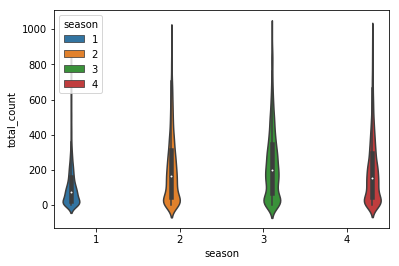

In [11]:
z = sn.violinplot(data=stats, x='season', y= 'total_count', hue = 'season')

<B> By above plot, spring season is when higher probability 
that members of the population will take on the same as median value of
population count i.e. ~150. Rest all seasons show skinny distribution across

<B> Finding Outliers in the Dataset by User Type, Temperature and Windspeed using Box Plots

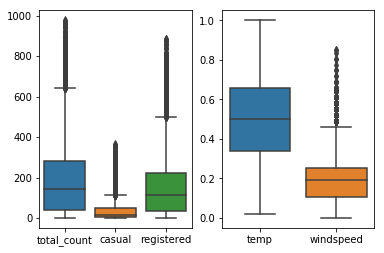

In [12]:
fig, (ax1,ax2) = plt.subplots(ncols = 2)
sn.boxplot(data = stats[['total_count', 'casual', 'registered']], ax = ax1)
sn.boxplot(data = stats[['temp', 'windspeed']], ax = ax2)

<B> The total, casual & registered type users show sizeable number of outlier values, 
however casual show lower numbers though. For weather attributes 
of temperature and wind speed, we see outliers only in the case of windspeed.

[Text(0,0.5,u'Count'),
 Text(0.5,0,u'Week Day'),
 Text(0.5,1,u'Box Plot On Count Across Week Days')]

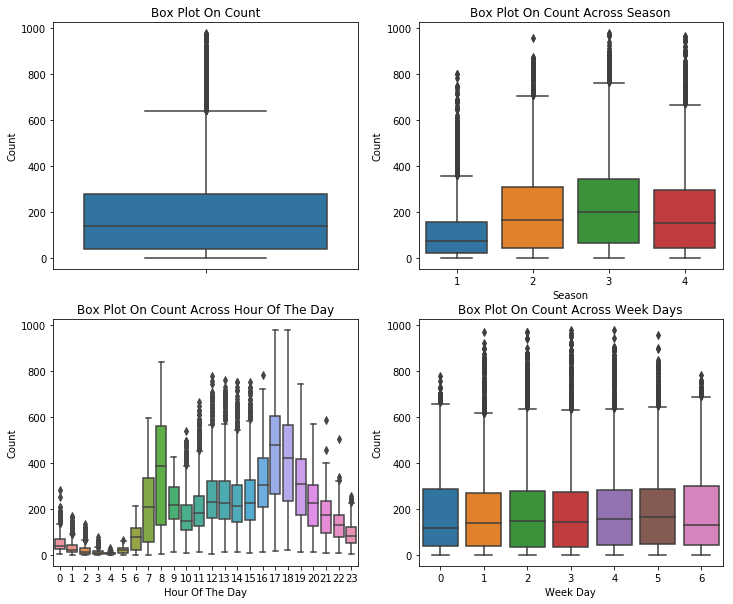

In [13]:
# OUTLIER Analysis
import seaborn as sn

fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sn.boxplot(data=stats,y="total_count",orient="v",ax=axes[0][0])
sn.boxplot(data=stats,y="total_count",x="season",orient="v",ax=axes[0][1])
sn.boxplot(data=stats,y="total_count",x="hour",orient="v",ax=axes[1][0])
sn.boxplot(data=stats,y="total_count",x="weekday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Week Day', ylabel='Count',title="Box Plot On Count Across Week Days")

<B>Outliers Analysis</b>
At first look, "count" variable contains lot of outlier data points which skews the distribution towards right (as there are more data points beyond Outer Quartile Limit).But in addition to that, following inferences can also been made from the simple boxplots given below.

Spring season has got relatively lower count.The dip in median value in boxplot gives evidence for it.
The boxplot with "Hour Of The Day" is quiet interesting.The median value are relatively higher at 7AM - 8AM and 5PM - 6PM. It can be attributed to regular school and office users at that time.
Most of the outlier points are mainly contributed from "Working Day" than "Non Working Day". It is quiet visible from from figure 4.

<B> Lets Remove Outliers In The Count Column

In [14]:
dailyDataWithoutOutliers = stats[np.abs(stats["total_count"]-stats["total_count"].mean())<=(3*stats["total_count"].std())] 

print ("Shape Of The Before Ouliers: ",stats.shape)
print ("Shape Of The After Ouliers: ",dailyDataWithoutOutliers.shape)

('Shape Of The Before Ouliers: ', (17379, 17))
('Shape Of The After Ouliers: ', (17135, 17))


<h1>Correlation Analysis

One common to understand how a dependent variable is influenced by features (numerical) is to fibd a correlation matrix between them. Lets plot a correlation plot between "count" and ["temp","atemp","humidity","windspeed"].

temp and humidity features has got positive and negative correlation with count respectively.Although the correlation between them are not very prominent still the count variable has got little dependency on "temp" and "humidity".
windspeed is not gonna be really useful numerical feature and it is visible from it correlation value with "count"
"atemp" is variable is not taken into since "atemp" and "temp" has got strong correlation with each other. During model building any one of the variable has to be dropped since they will exhibit multicollinearity in the data.
"Casual" and "Registered" are also not taken into account since they are leakage variables in nature and need to dropped during model building.
Regression plot in seaborn is one useful way to depict the relationship between two features. Here we consider "count" vs "temp", "humidity", "windspeed".

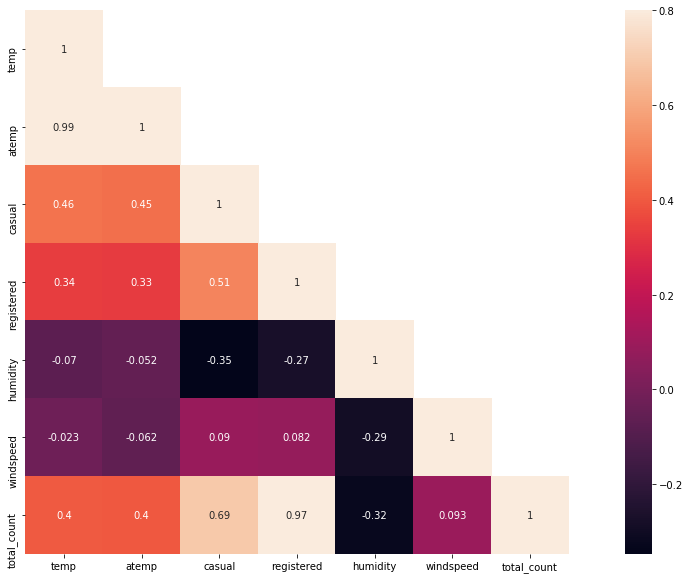

In [15]:
corrMatt = stats[["temp","atemp","casual","registered","humidity","windspeed","total_count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

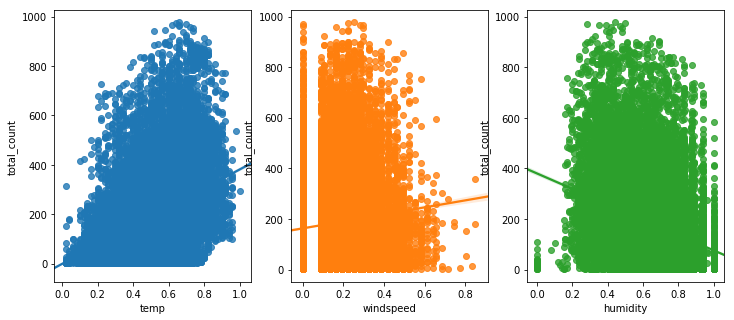

In [16]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sn.regplot(x="temp", y="total_count", data=stats,ax=ax1)
sn.regplot(x="windspeed", y="total_count", data=stats, ax=ax2)
sn.regplot(x="humidity", y="total_count", data=stats,ax=ax3)

<H1>Histogram to show volume of bike rental counts frequency

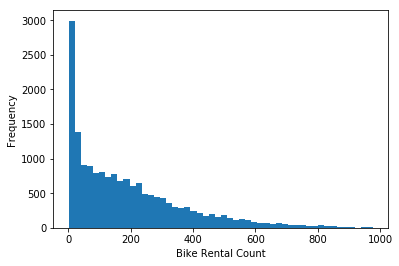

In [67]:
#sn.set()
_ = plt.hist(stats['total_count'], bins=50)
plt.xlabel("Bike Rental Count")
plt.ylabel("Frequency")
plt.show()

<h1> Beeswarm plot

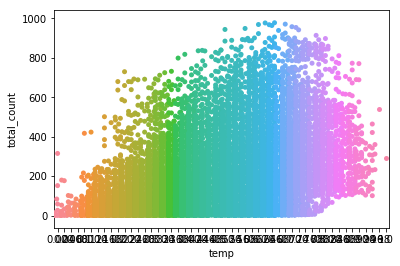

In [64]:

_ = sn.swarmplot(x='temp', y ='total_count', data = stats)

plt.show()

<H1> Plotting ECDF Empirical Cumulative Distribution Function

17379
[5.75407101e-05 1.15081420e-04 1.72622130e-04 ... 9.99884919e-01
 9.99942459e-01 1.00000000e+00]


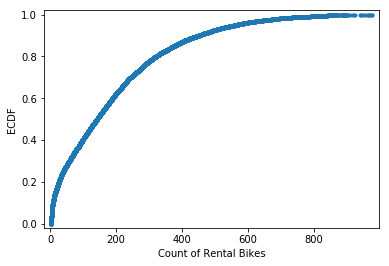

In [43]:
n= len(stats)
print(n)
x = np.sort(stats['total_count'])
y = np.arange(1,len(x)+1)/float(len(x)) 
print (y)

_= plt.plot(x, y, marker = '.', linestyle = 'none')
_= plt.xlabel('Count of Rental Bikes')
_= plt.ylabel('ECDF')
_= plt.margins(.02)

plt.show()

In [33]:
np.percentile(stats['total_count'], [25, 50, 75, 90, 98, 100])

array([ 40. , 142. , 281. , 451.2, 690. , 977. ])

In [21]:
np.var(stats['total_count'])

32899.56793087754

In [22]:
np.std(stats['total_count'])

181.38238043116962

In [23]:
#Covariance how two quantities vary together
np.cov(stats['total_count'], stats['temp'])

array([[3.29014611e+04, 1.41375997e+01],
       [1.41375997e+01, 3.70778598e-02]])

In [24]:
#Pearson Coorrelation Coefficient
np.corrcoef(stats['total_count'], stats['temp'])

array([[1.        , 0.40477228],
       [0.40477228, 1.        ]])

<B> Since there are outliers in the data so Normal distribution may not make sense

<h1> Finding Optimal Parameters & Residual Sum of Squares (RSS) if ECDF is not the right estimate of mean

<B> EDA of Bike Rental Count versus Registered User Type

In [25]:
print(np.corrcoef(stats['total_count'], stats['registered']))

[[1.         0.97215073]
 [0.97215073 1.        ]]


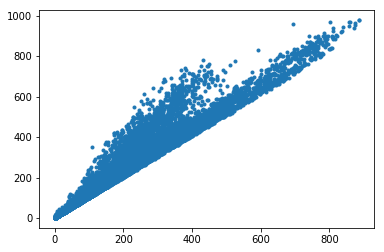

In [26]:
x=stats['registered']
y=stats['total_count']
_=plt.plot(x, y, marker ='.', linestyle ='none')

<b> Based on above Pearson Correlation coeeficient value ~1 and scatter plot, it is safe to assume Bike REntal Count vs Registered User Type to be linear function. 
 <b>   Above calculated x, y will be continued in use for further inferential statistics below.

<B> Next steps be find optimal parameters, theoretical line, its line plot, initialize RSS for all possible values of slope(a), compute rss & plot

In [27]:
a, b= np.polyfit(x,y,1)
print('slope =', a, 'Bike Rental Count / percent registerd User Type')
print('intercept =', b, 'Bike Rental Count')

('slope =', 1.1650320363746498, 'Bike Rental Count / percent registerd User Type')
('intercept =', 10.296458231132737, 'Bike Rental Count')


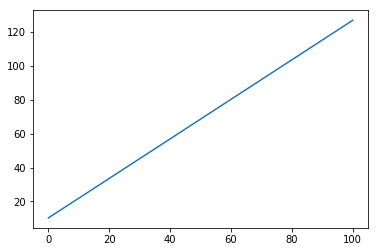

In [28]:
#Theoretical linear function t=a*s + b 
s = np.array([0,100])
t= a*s +b
_ = plt.plot(s,t)
plt.show()

In [29]:
#computing RSS
a_vals = np.linspace(0,1,200)
rss= np.empty_like(a_vals)

Text(0,0.5,u'sum of square of residuals')

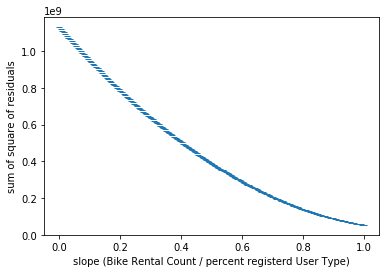

In [30]:
for i, a in enumerate(a_vals):
    rss[i]=np.sum((y - a * x -b)**2)
    
plt.plot(a_vals, rss,'_')
plt.xlabel('slope (Bike Rental Count / percent registerd User Type)')
plt.ylabel('sum of square of residuals')

<b>minimum on the plot, that is the value of the slope (~1.16) that gives the minimum sum of the square of the residuals, is the same value I got when performing the regression above using np.polyfit()

<h1> Visualizing ECDF using bootstrap samples

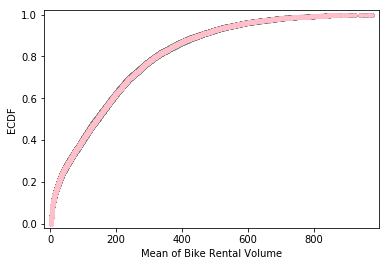

In [69]:
for i in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(stats['total_count'], size=len(stats))

    # Compute and plot ECDF from bootstrap sample
    x = np.sort(bs_sample)
    y = np.arange(1,len(x)+1)/float(len(x)) 


    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x = np.sort(stats['total_count'])
y = np.arange(1,len(x)+1)/float(len(x)) 

_ = plt.plot(x, y, marker='.', color= 'pink')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('Mean of Bike Rental Volume')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

<b> By graphically displaying the bootstrap samples with an ECDF, I see how bootstrap sampling allows probabilistic descriptions of data.

<h1> Confidence Interval

<B> Step 1: Build a function to create a bootstrap replicate

In [51]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(stats['total_count'], size=len(stats['total_count'])))
#np.random.choice() works on linear model

<b> Step 2: Another function to generate multiple such bootstrap samples

In [52]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

<b> Step 3: Plot the histogram for bootstrap replicates

1.3758868046313306
1.3694500402279113


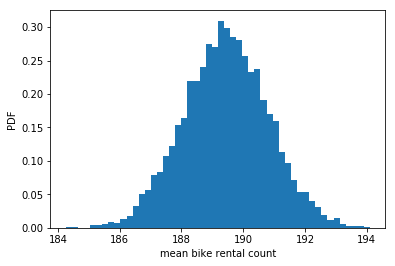

In [54]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(stats['total_count'], np.mean, 10000)

# Compute and print SEM Standard Error of the Mean
sem = np.std(stats['total_count']) / np.sqrt(len(stats['total_count']))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean bike rental count')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

<b> This is bootstrap estimate of the probability distribution function of the mean Bike Rental Count at the Capital Bikeshare System. Remember, we are estimating the mean Bike Rental Count we would get if the Capital Bikeshare System could repeat all of the measurements from 2011 to 2012 over and over again. This is a probabilistic estimate of the mean. I plot the PDF as a histogram, and I see that it is not Normal as it has slightly longer left tail.

In fact, it can be shown theoretically that under not-too-restrictive conditions, the value of the mean will always be Normally distributed. (This does not hold in general, just for the mean and a few other statistics.) The standard deviation of this distribution, called the standard error of the mean, or SEM, is given by the standard deviation of the data divided by the square root of the number of data points. I.e., for a data set.
Notice that the SEM we got from the known expression and the bootstrap replicates is the same and the distribution of the bootstrap replicates of the mean is Normal.

<b> Assuming 95% Confidence interval i.e. give the 2.5th and 97.5th percentile of bootstrap replicates is stored as bs_replicates

In [55]:
np.percentile(bs_replicates, [2.5, 97.5])

array([186.75732206, 192.15365527])

<b> The above steps may be repeated to show for Variance function as well

<B> Extending Confidence Interval Concept to Pairs Bootstrap

[1.1596482  1.17105497]


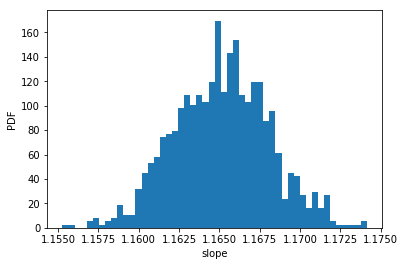

In [58]:
#Finding pairs bootstrap for slope & intercept of a linear function between Bike REntal Count and Registered User Type
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(stats['registered'], stats['total_count'], 1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))
# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

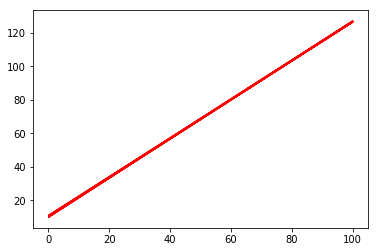

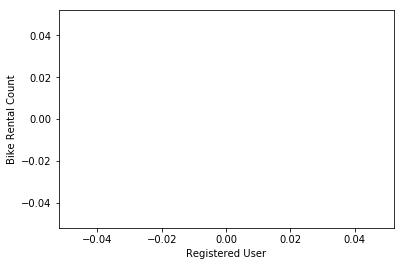

In [68]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,100])

# Plot the bootstrap lines
for i in range(1000):
    _ = plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.show()

# Label axes, set the margins, and show the plot
_ = plt.xlabel('Registered User')
_ = plt.ylabel('Bike Rental Count')
plt.margins(0.02)
plt.show()

<h1> Hypothesis Testing

<B> Null Hypothesis- Assuming User Type Casual & Registered carry similar influence on Bike Rental Count

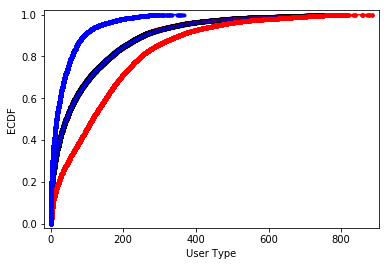

In [73]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(
                                    stats['registered'], stats['casual'])

    # Compute and plot ECDF from permutation sample 1 
    x1 = np.sort(perm_sample_1)
    y1 = np.arange(1,len(x1)+1)/float(len(x1)) 
    
    # Compute and plot ECDF from permutation sample 2
    x2 = np.sort(perm_sample_2)
    y2 = np.arange(1,len(x2)+1)/float(len(x2))


    # Plot ECDFs of permutation sample
    _ = plt.plot(x1, y1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x2, y2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)
# Compute and plot ECDF from original 'registered'
x1 = np.sort(stats['registered'])
y1 = np.arange(1,len(x)+1)/float(len(x)) 

_ = plt.plot(x1, y1, marker='.', color= 'red')

# Compute and plot ECDF from original 'casual'
x2 = np.sort(stats['casual'])
y2 = np.arange(1,len(x2)+1)/float(len(x2)) 

_ = plt.plot(x2, y2, marker='.', color= 'blue')
# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('User Type')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

<b> Permutation samples ECDFs overlap and give a purple haze. Few of the ECDFs from the permutation samples overlap with the observed Registered User type data towards right of the graph & even fewer overlap towards left, suggesting that the hypothesis is not commensurate with the data. Registered & Casual User Type are not identically distributed and do not influence data in similar way. So Null Hypothesis is not correct.

<h1> Test Statistic

<b> It is a single number that may be computed from observed data & from data you simulate under the null hypothesis. 